<a href="https://colab.research.google.com/github/YasithaRenuk/DeepLearningGroup/blob/main/IT21193804_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))


GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [14]:
print(tf.__version__)

2.17.0


Import Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Data Preprocessing

In [16]:
#importing dataset
train_dir = "/content/drive/MyDrive/DL/data/train"
test_dir = "/content/drive/MyDrive/DL/data/test"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)  # Normalize pixel values
test_datagen = ImageDataGenerator(

)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Resize images to a common size
    batch_size=32,           # Number of images to process in a batch
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


x_train, y_train = next(train_generator) # Use next(train_generator) to get the next batch
x_test, y_test = next(test_generator)   # Use next(test_generator) to get the next batch

x_train=x_train/255
x_test=x_test/255

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
x_train.shape,y_train.shape

((32, 256, 256, 3), (32,))

In [20]:
y_train.min(),y_train.max()

(0.0, 1.0)

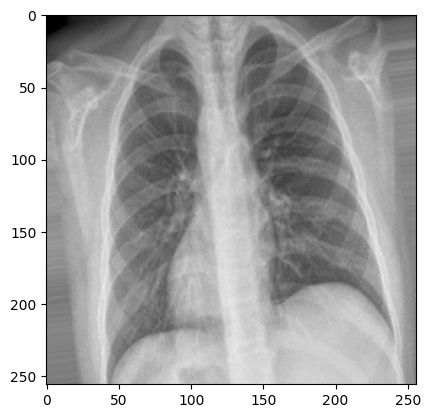

In [22]:
plt.imshow(x_train[0])

In [23]:
y_train[0]

0.0

In [24]:
# Reshape images to 2D array (flatten)
img_height = x_train.shape[1]
img_width = x_train.shape[2]
x_train_flat = x_train.reshape((x_train.shape[0], img_height * img_width, 3))  # Flatten spatial dimensions but keep channels
x_test_flat = x_test.reshape((x_test.shape[0], img_height * img_width, 3))

# Adjust input_shape to match the new flattened shape
model = tf.keras.Sequential()

# First LSTM Layer - Reduce units or add more dropout
model.add(tf.keras.layers.LSTM(units=64, activation='relu', return_sequences=True, input_shape=(x_train_flat.shape[1], x_train_flat.shape[2]))) # Reduced units to 32
model.add(tf.keras.layers.Dropout(0.3)) # Increased dropout to 0.3
model.add(tf.keras.layers.BatchNormalization())

# Second LSTM Layer - Reduce units or add more dropout
model.add(tf.keras.layers.LSTM(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # Increased dropout to 0.3
model.add(tf.keras.layers.BatchNormalization())

# Fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, clipvalue=1.0)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary - Call only once after compilation
model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 65536, 64)           │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 65536, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 65536, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,057 (207.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 256 (1.00 KB)

# Train Model

In [25]:
history = model.fit(x_train_flat, y_train, epochs=20, batch_size=4, validation_data=(x_test_flat, y_test))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 128s 16s/step - accuracy: 0.4567 - loss: 0.7917 - val_accuracy: 0.5938 - val_loss: 0.6949
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 149s 17s/step - accuracy: 0.2688 - loss: 1.0651 - val_accuracy: 0.5938 - val_loss: 0.6945
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 120s 16s/step - accuracy: 0.3896 - loss: 1.0605 - val_accuracy: 0.5938 - val_loss: 0.6949
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 142s 16s/step - accuracy: 0.4071 - loss: 1.0118 - val_accuracy: 0.5938 - val_loss: 0.6949
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 15s/step - accuracy: 0.4826 - loss: 0.8127 - val_accuracy: 0.5938 - val_loss: 0.6941
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 154s 17s/step - accuracy: 0.5175 - loss: 0.7559 - val_accuracy: 0.5938 - val_loss: 0.6938
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 131s 16s/step - accuracy: 0.4326 - loss: 0.8134 - val_accuracy: 0.5938 - val_loss: 0.6935
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 152s 17s/step - accuracy: 0.4438 - loss: 0.8456 - val_accuracy: 0.5938 - val_loss:

In [26]:
#confusion metrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_train)
print(cm)

[[ 9 10]
 [ 5  8]]


In [27]:
acc_cm = accuracy_score(y_test, y_train)
print(acc_cm)

0.53125


In [28]:
#learning curve
def learning_curve(history,epoch):

  #training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  # traning vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()



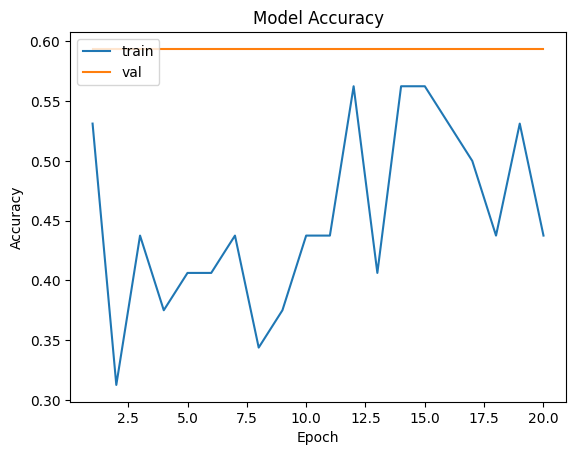

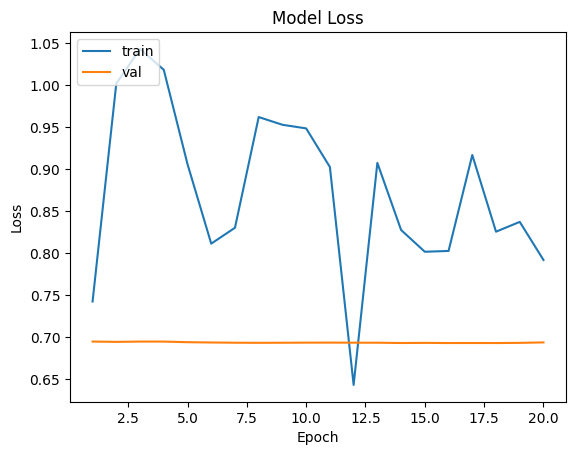

In [29]:
learning_curve(history,20)

In [31]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_train)

print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5161


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_train))


              precision    recall  f1-score   support

         0.0       0.64      0.47      0.55        19
         1.0       0.44      0.62      0.52        13

    accuracy                           0.53        32
   macro avg       0.54      0.54      0.53        32
weighted avg       0.56      0.53      0.53        32

